# **2 (Option I). (Trends, Searches, and Sentiment)** 
2 (Option I). (Trends, Searches, and Sentiment)** <br>a. Use the Twitter Trends API to determine the available trending topics for a city of your choice, assigning a tweet volume of 5000 to any trend with no volume provided.

 <br>b. After sorting the trends in descending order by volume, create a bar graph with each (sorted) trend on the x-axis against its volume on the y-axis. 
 
 <br>c. Use the Twitter Search API to find 20 tweets for each of the three most popular trends in the chosen city, and preprocess their associated tweet text (preferring extended tweet text, if available) in a manner appropriate for tweets. 
 
 <br>d. Use `TextBlob` to determine the sentiment for each set of 20 tweets.  
 
 <br> i. Do you notice a substantial difference in the proportion of positive and negative sentiment for the three trends?  Try to theorize why or why not.  
 
 <br> ii. Do you believe the sentiment analysis to be reliable for any or all of the trend?  Explain why or why not.



## Twitter Trends, Searches, and Sentiment

### Load API Keys
 


In [77]:
import tweepy
import os
APIK = os.environ.get('APIK')
APISK = os.environ.get('APISK')
ACCTO = os.environ.get('ACCTO')
ACCTOS = os.environ.get('ACCTOS')
auth = tweepy.OAuthHandler(APIK, APISK) #Set up the app keys
auth.set_access_token(ACCTO,
                      ACCTOS) #set up your user tokens
api = tweepy.API(auth, wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)


### Basic Tweepy Commands

In [78]:
cbhami02 = api.get_user('cbhami02')

In [79]:
api = tweepy.API(auth)


In [80]:
user_info = api.get_user(screen_name='cbhami02')
print(user_info)

User(_api=<tweepy.api.API object at 0x0000024B5E786A60>, _json={'id': 1515682874837643269, 'id_str': '1515682874837643269', 'name': 'Cole Hamilton', 'screen_name': 'Cbhami02', 'location': 'San Antonio, TX', 'profile_location': {'id': '3df4f427b5a60fea', 'url': 'https://api.twitter.com/1.1/geo/id/3df4f427b5a60fea.json', 'place_type': 'unknown', 'name': 'San Antonio, TX', 'full_name': 'San Antonio, TX', 'country_code': '', 'country': '', 'contained_within': [], 'bounding_box': None, 'attributes': {}}, 'description': 'My Developer Account. Just for fun and sharing fascinating topics! Data Enthusiast, Fortniter, Robloxer, and a little bit of nerd.', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 1, 'friends_count': 90, 'listed_count': 0, 'created_at': 'Sun Apr 17 13:25:44 +0000 2022', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 13, 'lang': None, 'status': {'created_a

In [81]:
print(f'{user_info.followers_count} users are following {user_info.screen_name}.')

1 users are following Cbhami02.


In [82]:
user_info.name  # name associated with the user’s account

'Cole Hamilton'

In [83]:
user_info.screen_name  # user’s Twitter handle

'Cbhami02'

In [84]:
user_info.description  # description from the user’s profile

'My Developer Account. Just for fun and sharing fascinating topics! Data Enthusiast, Fortniter, Robloxer, and a little bit of nerd.'

In [85]:
user_info.status  # most recent tweet's text

Status(_api=<tweepy.api.API object at 0x0000024B5E786A60>, _json={'created_at': 'Wed May 11 23:15:22 +0000 2022', 'id': 1524528622719184896, 'id_str': '1524528622719184896', 'text': '“Complete Exploratory Data Analysis using Python” by Uğur Savcı\nhttps://t.co/Vp44o2jQTU https://t.co/bEf5HBRtt8', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/Vp44o2jQTU', 'expanded_url': 'https://link.medium.com/IobrYt5fXpb', 'display_url': 'link.medium.com/IobrYt5fXpb', 'indices': [64, 87]}], 'media': [{'id': 1524528618034106370, 'id_str': '1524528618034106370', 'indices': [88, 111], 'media_url': 'http://pbs.twimg.com/media/FSg2s2fXEAIom5R.jpg', 'media_url_https': 'https://pbs.twimg.com/media/FSg2s2fXEAIom5R.jpg', 'url': 'https://t.co/bEf5HBRtt8', 'display_url': 'pic.twitter.com/bEf5HBRtt8', 'expanded_url': 'https://twitter.com/Cbhami02/status/1524528622719184896/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'res

In [86]:
print(f'{user_info.screen_name} is following {user_info.friends_count} users.')

Cbhami02 is following 90 users.


### Tweepy API User Info

In [87]:
api = tweepy.API(auth)

In [88]:
me = api.verify_credentials()

In [89]:
me.name

'Cole'

In [90]:
print(f'I have {me.followers_count} follower.')
print(f'I am following {me.friends_count} users.')

I have 20 follower.
I am following 164 users.


### Rate Limits

In [91]:
api.rate_limit_status()

{'rate_limit_context': {'access_token': '2777419660-hIblVunw1TwIbGqiNE9HWcogMx3OaxTtRe0YxJN'},
 'resources': {'lists': {'/lists/list': {'limit': 15,
    'remaining': 15,
    'reset': 1652504867},
   '/lists/:id/tweets&GET': {'limit': 900,
    'remaining': 900,
    'reset': 1652504867},
   '/lists/:id/followers&GET': {'limit': 180,
    'remaining': 180,
    'reset': 1652504867},
   '/lists/memberships': {'limit': 75, 'remaining': 75, 'reset': 1652504867},
   '/lists/:id&DELETE': {'limit': 300, 'remaining': 300, 'reset': 1652504867},
   '/lists/subscriptions': {'limit': 15, 'remaining': 15, 'reset': 1652504867},
   '/lists/members': {'limit': 900, 'remaining': 900, 'reset': 1652504867},
   '/lists/:id&GET': {'limit': 75, 'remaining': 75, 'reset': 1652504867},
   '/lists/subscribers/show': {'limit': 15,
    'remaining': 15,
    'reset': 1652504867},
   '/lists/:id&PUT': {'limit': 300, 'remaining': 300, 'reset': 1652504867},
   '/lists/show': {'limit': 75, 'remaining': 75, 'reset': 1652504

In [92]:
cbhami02=api.get_user(screen_name='cbhami02')


In [93]:
print(api.rate_limit_status()['resources']['users']['/users/:id'])

{'limit': 900, 'remaining': 897, 'reset': 1652504866}


In [94]:
print(api.rate_limit_status()['resources']['application']['/application/rate_limit_status'])

{'limit': 180, 'remaining': 180, 'reset': 1652504867}


### Followers

In [95]:
cursor = tweepy.Cursor(api.followers)

In [96]:
followers = []  # for storing followers' User objects
for account in cursor.items(15):  # request only 10 results (10 most recent followers in this case)
    followers.append(account.screen_name)

In [97]:
print('Followers:', 
      ' '.join(sorted(followers, key=lambda s: s.lower())))

Followers: 1SG_Hamilton adore_myBitches BrockCline ChildsSherry GucciManeNtail HamptonRFinest mwyattea OrderUpFayville PjCarl porge10 sayedabdulqadee shefferba49 soldiersofpaint VA_HomeLoan yongkuansima


In [98]:
cursor = tweepy.Cursor(api.followers, screen_name='nasa', count=200)
followers = []
for account in cursor.items(10):  # request 2 pages of followers
    followers.append(account.screen_name)

print(followers)

['Chrisbo1515', 'On85601372', 'Lx100hht', 'borasi_madhu', 'CakicLidija', 'hon_yara_dou', '4UJyy_', 'MatthewBurleig6', 'flanelbiru', 'DeadlyHunter37']


In [99]:
cursor = tweepy.Cursor(api.followers_ids, screen_name='nasa', count=5000)
followers_ids = []
for accountid in cursor.items(5000): #request 1 page of follower_ids
    followers_ids.append(accountid)

In [100]:
followers_ids_fragments = [followers_ids[i * 100:(i + 1) * 100] for i in range((len(followers_ids) + 100 - 1) // 100 )] 
print (followers_ids_fragments[0])

[1525337600780693505, 1525337828388913155, 1486409584306757636, 1525338129841786882, 1525338025969930240, 1525335342194511872, 1525333095171375106, 1110801046442381318, 1525337596741689344, 1525337457134166018, 1525337344697860096, 1467453330209140736, 1525337996249010177, 1525337349755912196, 1525337304448917504, 1525336891842764800, 1525337492194459650, 1333770431569022979, 1525326964864729089, 1525336050042032128, 1525337664702058498, 1525337424293171201, 916314153069039616, 1525315140811300865, 1525336672606355457, 1525334406667325440, 1525337481570295808, 1500308345722310656, 1525336074364526595, 1439166790408409092, 1525337806750777344, 1525337014853177345, 1525337413157019648, 1525337496103505920, 1525337383503376384, 1525335599795814408, 1525336872288935944, 1525332973607739393, 1525337533047099392, 1385041619238363136, 1525337608250961922, 1525336607418732544, 1525329841595244545, 1525337625959272449, 1519907590020292608, 1525337494853591040, 1503506525796679684, 1525326904521

### Rate Limits

In [101]:
print(api.rate_limit_status()['resources']['followers']['/followers/ids'])


{'limit': 15, 'remaining': 14, 'reset': 1652504869}


In [102]:
print(api.rate_limit_status()['resources']['users']['/users/lookup'])

{'limit': 900, 'remaining': 900, 'reset': 1652504869}


### Search Tweets by Topic

In [103]:
def print_tweets(tweets):
    """For each Tweepy Status object in tweets, display the 
    user's screen_name and tweet text. If the language is not
    English, translate the text with TextBlob."""
    for tweet in tweets:
        print(f'{tweet.user.screen_name}:', end=' ')
    
        if 'en' in tweet.lang:
            print(f'{tweet.text}\n')
        elif 'und' not in tweet.lang:  # translate to English first
            print(f'\n  ORIGINAL: {tweet.text}')
            try:
                print(f'TRANSLATED: {TextBlob(tweet.text).translate()}\n')
            except:
                print('Unable to translate tweet')

In [104]:
tweets = api.search(q='Johnny Depp', count=3)

In [105]:
print_tweets(tweets) 

aundrias: RT @Rebeca29736893: WE LOVE YOU JOHNNY DEPP !!!
#JohnnyDepp #JusticeForJohnnyDepp #WELOVEYOUJOHNNYDEPP #WeAreWithYouJohnnyDepp 💓♥️❤️💝🐢🐢🐢🐢🐰🐇…

themoviesseries: If there is a trend I wish #johnnydepp sees above all is this one 💞💞💞
WE LOVE YOU JOHNNY DEPP.
We know you aren't p… https://t.co/UW5nPfZPCb

13claudia_: 
  ORIGINAL: RT @westenthu: wst Johnny Depp &amp; Winona Ryder  
 https://t.co/uvEmYuAWwJ
Unable to translate tweet


In [106]:
tweets = api.search(q='Johnny Depp :)', count=3) #Only "positive sentiment tweets involving basketball"

In [107]:
tweets = api.search(q='#Heard', count=5)

In [108]:
print_tweets(tweets)

gloxgoldnchildr: RT @gloxgoldnchildr: #Seriously though 🤔 I am a #bit #concerned 🇯🇲💯 at how #inhumane our #citizens have #become with #one another! The #cri…

hephaistos_ai: RT @theTACpodcast: Thanks to @TheHumanResolve for sharing his story of #courage for the micro-series! In the 1st episode, Savio and a few o…

theTACpodcast: Thanks to @TheHumanResolve for sharing his story of #courage for the micro-series! In the 1st episode, Savio and a… https://t.co/YKZqsktfvx

SvetaDoronina2: RT @SarahJReports: What are people saying about #seen &amp; #heard? #underreportednews song by @MilesMinnick #NativeTwitter #DisabilityTwitter…



### Trends Available

In [109]:
trends_available = api.trends_available()

In [110]:
len(trends_available)

467

In [111]:
trends_available[0]

{'name': 'Worldwide',
 'placeType': {'code': 19, 'name': 'Supername'},
 'url': 'http://where.yahooapis.com/v1/place/1',
 'parentid': 0,
 'country': '',
 'woeid': 1,
 'countryCode': None}

In [112]:
trends_available[1]

{'name': 'Winnipeg',
 'placeType': {'code': 7, 'name': 'Town'},
 'url': 'http://where.yahooapis.com/v1/place/2972',
 'parentid': 23424775,
 'country': 'Canada',
 'woeid': 2972,
 'countryCode': 'CA'}

In [113]:
world_trends_comp = api.trends_place(id=1)  # Worldwide trending topics (list containing one dictionary)

In [114]:
world_trends = world_trends_comp[0]['trends'] # The 'trends' key is tied to the info about the actual trending topics

In [115]:
world_trends[4]

{'name': 'Curry',
 'url': 'http://twitter.com/search?q=Curry',
 'promoted_content': None,
 'query': 'Curry',
 'tweet_volume': 58441}

In [116]:
for iter in range(3):
    print(world_trends[iter])

{'name': 'Klay', 'url': 'http://twitter.com/search?q=Klay', 'promoted_content': None, 'query': 'Klay', 'tweet_volume': 72842}
{'name': 'Warriors', 'url': 'http://twitter.com/search?q=Warriors', 'promoted_content': None, 'query': 'Warriors', 'tweet_volume': 181735}
{'name': 'Tatum', 'url': 'http://twitter.com/search?q=Tatum', 'promoted_content': None, 'query': 'Tatum', 'tweet_volume': 110068}


In [117]:
world_trends_baseline = [t for t in world_trends if t['tweet_volume']]
world_trends_high_volume = [t for t in world_trends if (t['tweet_volume']) and(t['tweet_volume']>100000)]
print(f'Total world trends: {len(world_trends)}') #Remember that the cap of returned trends is 50!
print(f'Total world trends >10k volume: {len(world_trends_baseline)}')
print(f'Total world trends >100k volume: {len(world_trends_high_volume)}')


Total world trends: 50
Total world trends >10k volume: 23
Total world trends >100k volume: 5


### World_Trends

In [118]:
from operator import itemgetter 

In [119]:
World_trends_w_volume = [t for t in world_trends if (t['tweet_volume'])]
print(f'Total World trends >15k volume: {len(World_trends_w_volume)}')


Total World trends >15k volume: 23


In [120]:
world_trends_baseline.sort(key=itemgetter('tweet_volume'), reverse=True) #sort world trends by descending volume

In [121]:
for trend in world_trends_baseline[:10]: #Display the top 5 topics by volume
    print(trend['name'])

#PULLUPwithMarkTuan
Nacional Nacional
Warriors
Celtics
Tatum
#Sialkot
Bucks
Giannis
Klay
#ずっとJUMPもっとJUMP


### SA_Trends

In [122]:
SA_trends_comp = api.trends_place(id=2487796)

In [123]:
SA_trends = SA_trends_comp[0]['trends']

In [124]:
SA_trends_baseline = [t for t in SA_trends if t['tweet_volume']]

In [125]:
for trend in SA_trends_baseline:
    print(trend)

{'name': 'Miro', 'url': 'http://twitter.com/search?q=Miro', 'promoted_content': None, 'query': 'Miro', 'tweet_volume': 23954}
{'name': 'Milwaukee', 'url': 'http://twitter.com/search?q=Milwaukee', 'promoted_content': None, 'query': 'Milwaukee', 'tweet_volume': 22274}
{'name': 'Nationals', 'url': 'http://twitter.com/search?q=Nationals', 'promoted_content': None, 'query': 'Nationals', 'tweet_volume': 13901}
{'name': 'olivia rodrigo', 'url': 'http://twitter.com/search?q=%22olivia+rodrigo%22', 'promoted_content': None, 'query': '%22olivia+rodrigo%22', 'tweet_volume': 14393}
{'name': 'Klay', 'url': 'http://twitter.com/search?q=Klay', 'promoted_content': None, 'query': 'Klay', 'tweet_volume': 72222}
{'name': 'Warriors', 'url': 'http://twitter.com/search?q=Warriors', 'promoted_content': None, 'query': 'Warriors', 'tweet_volume': 180248}
{'name': 'Looney', 'url': 'http://twitter.com/search?q=Looney', 'promoted_content': None, 'query': 'Looney', 'tweet_volume': 28984}
{'name': 'Tatum', 'url': 'h

In [126]:
print(f'SA trends >15k volume: {len(SA_trends_baseline)}')


SA trends >15k volume: 16


In [127]:
SA_trends_baseline.sort(key=itemgetter('tweet_volume'), reverse=True) 

In [128]:
for trend in SA_trends_baseline[:20]:
    print(trend['name'])

Warriors
Celtics
Tatum
Klay
Curry
Steph
Looney
Panthers
ERCOT
Miro
Milwaukee
Dillon Brooks
olivia rodrigo
Nationals
#DubNation
TOH SPOILERS


In [129]:
SA_topics = {}  # dictionary to store trend names and volumes for San Antonio


In [130]:
print(SA_topics)

{}


In [131]:
for trend in SA_trends_baseline:
    SA_topics[trend['name']] = trend['tweet_volume']

In [132]:
import pandas as pd

SAdf = pd.DataFrame(SA_topics, index = [0]) 

In [133]:
SAdf.head()

,Warriors,Celtics,Tatum,Klay,Curry,Steph,Looney,Panthers,ERCOT,Miro,Milwaukee,Dillon Brooks,olivia rodrigo,Nationals,#DubNation,TOH SPOILERS
0,180248,111844,110149,72222,58441,46491,28984,28471,25384,23954,22274,15118,14393,13901,11764,10905


<AxesSubplot:title={'center':'Twitter Trends in San Antonio'}, xlabel='Trends', ylabel='Count'>

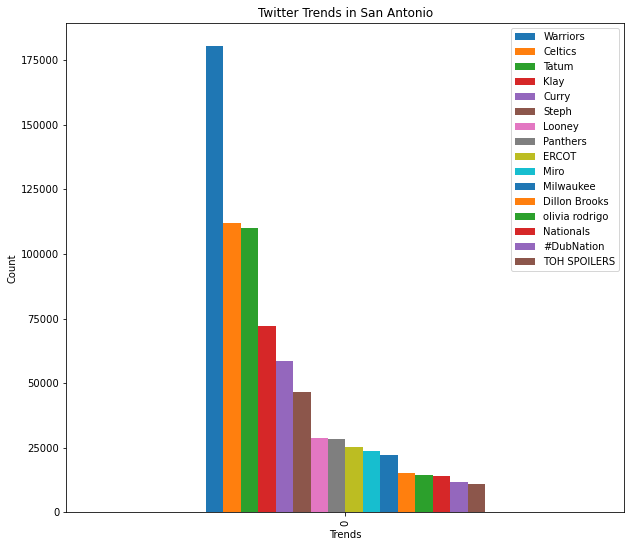

In [134]:
#Plot Descending
SAdf.plot(kind="bar",
 figsize=(10, 9),
  xlabel="Trends",
   ylabel="Count",
    title="Twitter Trends in San Antonio")

### WordCloud for SA_Trends

In [135]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [136]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
mask = np.array(Image.open('Texas.jpg'))

wordcloud_SA = WordCloud(mask=mask, width=1800, height=900,
    prefer_horizontal=0.5, min_font_size=10, colormap='prism', 
    background_color='white')

In [137]:
wordcloud_SA = wordcloud_SA.fit_words(SA_topics)

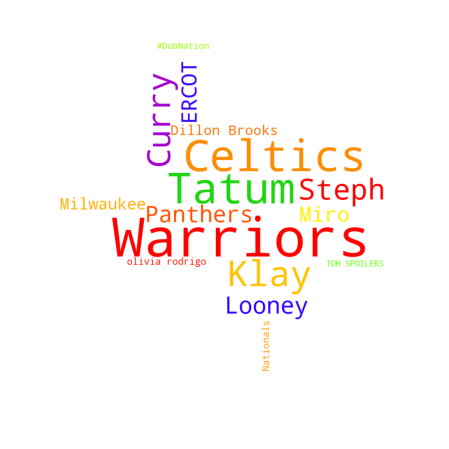

In [138]:

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
mask = np.array(Image.open('Texas.jpg'))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud_SA)
plt.axis("off")
plt.show()

## Tweet Listener

### Load Packages

In [139]:
from tweetlistener import TweetListener
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy import API
import preprocessor as p
from prepsubjecttweets import prepsubject

### Test Tweet Listener and Clean Tweet

In [140]:
tweet_text = 'RT #NASA A sample retweet with a URL https://nasa.gov'

In [141]:
p.clean(tweet_text)

'#NASA A sample retweet with a URL'

### Tweet Listener - Load Top Three Trends

In [142]:
tweetlistraw1,tweetlistprep1 = prepsubject('Macron',20)
tweetlistraw2,tweetlistprep2 = prepsubject('Ranboo',20)
tweetlistraw3,tweetlistprep3 = prepsubject('Publix',20)

### Number 1 Tweet Topic

In [143]:
tweetlistraw1

['@visegrad24 Agree... let´s give the Russians the Champagne region in France. Then Putin will save his face because… https://t.co/Wyhl4Poli6',
 'RT @EerikNKross: Zelensky revealing that Macron suggested he concedes to Putin on Ukrainian sovreignity, Austin calling Shoigu to ask for a…',
 'RT @expatua: Macron and Scholz\'s idea of giving up territory as to "not humiliate Putin" is fine.\n\nWe just need to decide which parts of Fr…',
 'RT @expatua: Macron and Scholz\'s idea of giving up territory as to "not humiliate Putin" is fine.\n\nWe just need to decide which parts of Fr…',
 'Out of 230 player official contingent why 98 applications in embassy of France in Delhi got delayed and they  ignor… https://t.co/hvcObtB6FV',
 'RT @KyivIndependent: “(Emmanuel Macron) has always said that it was up to the Ukrainians to decide the terms of their negotiations with the…',
 'RT @visegrad24: So which part of France is Macron willing to give up then?',
 'RT @irinatsukerman_: #France is stuck with M

In [144]:
tweetlistprep1

['@visegrad24 Agree... let´s give the Russians the Champagne region in France. Then Putin will save his face because…',
 '@EerikNKross: Zelensky revealing that Macron suggested he concedes to Putin on Ukrainian sovreignity, Austin calling Shoigu to ask for a…',
 '@expatua: Macron and Scholz\'s idea of giving up territory as to "not humiliate Putin" is fine. We just need to decide which parts of Fr…',
 '@expatua: Macron and Scholz\'s idea of giving up territory as to "not humiliate Putin" is fine. We just need to decide which parts of Fr…',
 'Out of 230 player official contingent why 98 applications in embassy of France in Delhi got delayed and they ignor…',
 '@KyivIndependent: “(Emmanuel Macron) has always said that it was up to the Ukrainians to decide the terms of their negotiations with the…',
 '@visegrad24: So which part of France is Macron willing to give up then?',
 '@irinatsukerman_: #France is stuck with Macron for another 5 years!',
 "@dszeligowski: Zelensky in an interview wi

### Number 2 Tweet Topic

In [145]:
tweetlistraw2

['RT @maxggstwo: Ranboo you said tyler is ruining it but atleast Michael is actually into him, unlike the guy u had a crush on',
 'RT @Forsakenmoons: ranboo nightlight \n#ranboofanart https://t.co/ZgYlAA2Qwf',
 'RT @alliumupdate: Ranboo was in offline chat! https://t.co/hQF9SWGlMt',
 'RT @Forsakenmoons: ranboo nightlight \n#ranboofanart https://t.co/ZgYlAA2Qwf',
 'RT @Forsakenmoons: ranboo nightlight \n#ranboofanart https://t.co/ZgYlAA2Qwf',
 'RT @PlantOnSpace: // blood\nFind Him\n#generationloss #generationlossfanart #ranboo #ranboofanart https://t.co/3JYIXGmhAM',
 'RT @bootwt: Ranboo hosted a space earlier! You can find the recording here!\nhttps://t.co/emuoCpl5lG',
 'RT @bootwt: Ranboo posted on his Instagram story! https://t.co/Vj9nSje4fA',
 'RT @elohour: ranboo’s the type of guy to eat straight butter',
 'RT @princessranboo: i’m so Sory but ranboo dinky little old mask makes me giggle https://t.co/EOUwyZfiip',
 'RT @Dakotafoxart: glowduo ✨\n\n[ #Ranboo #Aimsey #Glowduo #Ranbooart 

In [146]:
tweetlistprep2

['@maxggstwo: Ranboo you said tyler is ruining it but atleast Michael is actually into him, unlike the guy u had a crush on',
 '@Forsakenmoons: ranboo nightlight #ranboofanart',
 '@alliumupdate: Ranboo was in offline chat!',
 '@Forsakenmoons: ranboo nightlight #ranboofanart',
 '@Forsakenmoons: ranboo nightlight #ranboofanart',
 '@PlantOnSpace: // blood Find Him #generationloss #generationlossfanart #ranboo #ranboofanart',
 '@bootwt: Ranboo hosted a space earlier! You can find the recording here!',
 '@bootwt: Ranboo posted on his Instagram story!',
 '@elohour: ranboo’s the type of guy to eat straight butter',
 '@princessranboo: i’m so Sory but ranboo dinky little old mask makes me giggle',
 '@Dakotafoxart: glowduo ✨ [ #Ranboo #Aimsey #Glowduo #Ranbooart #AimseyFanart #Ranboofanart #bootwt @ranbooart @Ranboosaysstuff @ranaltb…',
 '@Dakotafoxart: glowduo ✨ [ #Ranboo #Aimsey #Glowduo #Ranbooart #AimseyFanart #Ranboofanart #bootwt @ranbooart @Ranboosaysstuff @ranaltb…',
 '@RanbooUpdates: Ra

### Number 3 Tweet Topic

In [147]:
tweetlistraw3

["Could really go for a Pub Sub from the 'Lix @Publix",
 'In Publix today a probably 80 year old woman leaned in really close and said "I really like that" and pointed to my… https://t.co/QJ9MAtEipR',
 'im going to publix in the morning and buying cookies I will not be seen bringing putussy to a party https://t.co/RZDuIYHSsa',
 '@CFunkFSU @Wegmans Meanwhile people in Florida out here cutting the roof of their mouths on that hard Publix bread… https://t.co/l53h5kWTv2',
 'RT @pleb_ian2: I would pay a lot of money rn for a @Publix sub to be made for me in Chicago',
 "@PotluckLauren @eyeamsushmita Look, don't be mad at me bc I'm not bringing the entire grocery aisle at Publix with… https://t.co/zq3FMpnlh5",
 "@GSmokesweed1 I had a roast beef wrap from Publix...spinach wrap, Boar's Head roast beef (double meat*), scant amou… https://t.co/mDkAP13P2J",
 "My pops said he saw Dennis Rodman at publix the other day. Q\nAnother thing about South Florida. You're bound to run… https://t.co/B011RQNBI

In [148]:
tweetlistprep3

["Could really go for a Pub Sub from the 'Lix @Publix",
 'In Publix today a probably 80 year old woman leaned in really close and said "I really like that" and pointed to my…',
 'im going to publix in the morning and buying cookies I will not be seen bringing putussy to a party',
 '@CFunkFSU @Wegmans Meanwhile people in Florida out here cutting the roof of their mouths on that hard Publix bread…',
 '@pleb_ian2: I would pay a lot of money rn for a @Publix sub to be made for me in Chicago',
 "@PotluckLauren @eyeamsushmita Look, don't be mad at me bc I'm not bringing the entire grocery aisle at Publix with…",
 "@GSmokesweed1 I had a roast beef wrap from Publix...spinach wrap, Boar's Head roast beef (double meat*), scant amou…",
 "My pops said he saw Dennis Rodman at publix the other day. Q Another thing about South Florida. You're bound to run…",
 "also i'm out of cheerwine, shit really need to see if kroger has cases of it here, publix just has the glass bottle 4 packs",
 '@Publix Dutch!

## Stream

### Load Packages

In [149]:
from tweepy.streaming import Stream
from tweepy import OAuthHandler
from tweepy import Stream
from textblob import TextBlob

### Sentiment Listener Topic 1

In [150]:
run sentimentlistener.py "#Macron" 20

  DividedStatesO4: @KyivPost #macron should never.. every speak.. he is a twat

  Gawiesnr: @KyivIndependent oh so France owns #Ukraine? who does #macron think he is

  Resistance2017: 🤣🤣🤣 and so us #Macron. !!

+ skingers: @moutet He's your kind of apologist not their kind of antagonist... #Macron #putin #Ukraine

  BKrede: @elonmusk @Twitter Begin by the account of #macron.. he has a lot!!

  EgoCaecilius: If we’re trying to isolate #Putin why is #Macron and #Scholz constantly giving him a call ?



### Sentiment Listener Topic 2

In [ ]:
run sentimentlistener.py "Ranboo" 20

  stray_giraffe: @alliumupdate since when did ranboo start giving out physical spoons too?

+ SurelyNotKoni: He's the most powerful being alive #ranboofanart #ranboo

  benchtrioups: — Ranboo posted on the communities tab on the Generation Loss channel!

  glowduoupdates: Ranboo posted on the communities tab on the Generation Loss channel!

+ ShinjiTakahirou: Gotta tweet this before I forget lol I had a dream where Ranboo went live with Aimsey and at the first few minutes…

  LEO__B00: @TheTerrainMC Ranboo

  UpdateBeeduo: Ranboo posted youtube community post on the gen-loss channel!-✨

  ShinjiTakahirou: Then just like last time Ranboo almost yk missed the mask, he actually did miss it this time. Like he put it on,but…

  ShinjiTakahirou: Then just like last time Ranboo almost yk missed the mask, he actually did miss it this time. Like he put it on,but…

- Yobarap_: what if the white half of c!ranboo is just albino enderman yknow both the enderman half and white half have scars…

- gi

### Sentiment Listener Topic 3

In [ ]:
run sentimentlistener.py "Publix" 20

+ GPerpignand27: Morning 🌎 Happy Friday the 13th @ Publix Deerfield Beach Warehouse

  ChocoWatcher: @dlldntop Nah I’m not that guy to take pics of ppl in publix🤣

  CatgirlEva: Looks like Publix is opening two stores in Hampton Roads, but they’re going to be in Suffolk and Norfolk. I really…

+ geasha75: Air Fried Pork Leg served with @Publix New York Potato Salad and a side salad not shown @YouTube Sheronia K…

  johnnysaygo: @Jklm48226521 @Marla_Knits @Franktheshank88 Everyone I've ever spoken to about Publix employees always say how grea…

  JohnRogers8News: #FBF Ten years ago this week I met Neil Armstrong at one of his last Publix events 🌙 🚀 He was and is one of my h…

+ browngirl1_: idk who get more of my money… target or Publix 🥴🥴

  moviesfromther1: It would appear someone in the Publix meat department might have been stoned when applying price tags to the chicke…

+ irieunruly: "the good publix" ** 😭😭

+ TamsinLM: @CatgirlEva You just want Publix so you can drink that foul ic

ProtocolError: ('Connection broken: IncompleteRead(20 bytes read)', IncompleteRead(20 bytes read))

In [ ]:
dftrend1 = pd.DataFrame({'Positive' : [15],
'Neutral' : [4],
'Negative' : [1]})
dftrend1.head()


,Positive,Neutral,Negative
0,15,4,1


In [ ]:
dftrend2 = pd.DataFrame({'Positive' : [11],
'Neutral' : [6],
'Negative' : [3]})
dftrend2.head()


,Positive,Neutral,Negative
0,11,6,3


In [ ]:
dftrend3 = pd.DataFrame({'Positive' : [7],
'Neutral' : [11],
'Negative' : [2]})
dftrend3.head()
#dftrend1.to_csv('dfs.csv', index = False)

,Positive,Neutral,Negative
0,7,11,2


<AxesSubplot:title={'center':'#1 Trend in San Antonio'}, xlabel='Trends', ylabel='Count'>

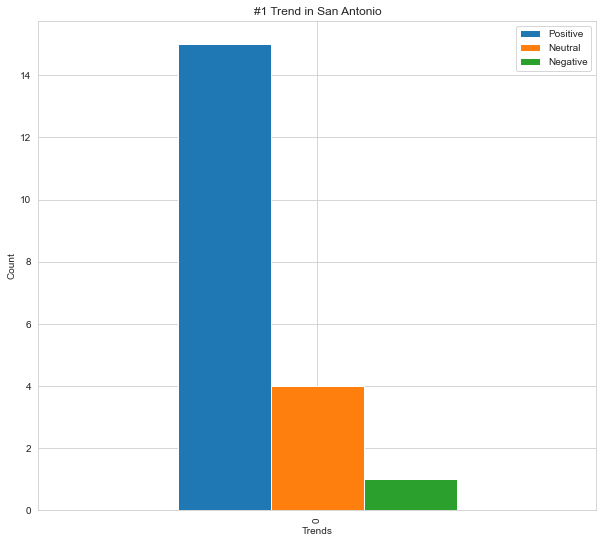

In [ ]:
dftrend1.plot(kind="bar",
 figsize=(10, 9),
  xlabel="Trends",
   ylabel="Count",
    title="#1 Trend in San Antonio")

<AxesSubplot:title={'center':'#2 Trend in San Antonio'}, xlabel='Trends', ylabel='Count'>

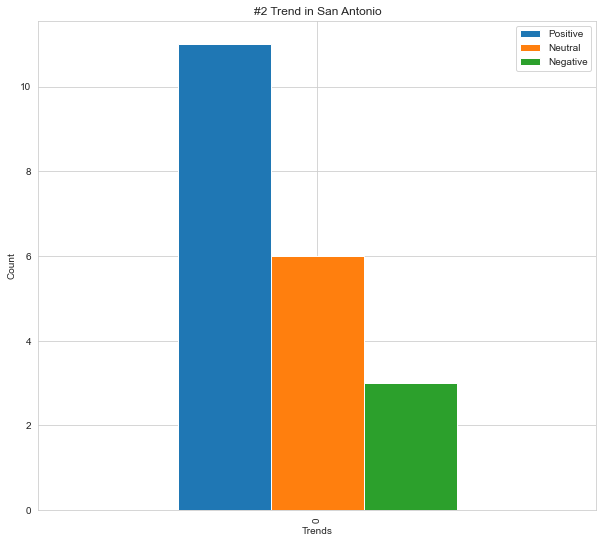

In [ ]:
dftrend2.plot(kind="bar",
 figsize=(10, 9),
  xlabel="Trends",
   ylabel="Count",
    title="#2 Trend in San Antonio")

<AxesSubplot:title={'center':'#3 Trend in San Antonio'}, xlabel='Trends', ylabel='Count'>

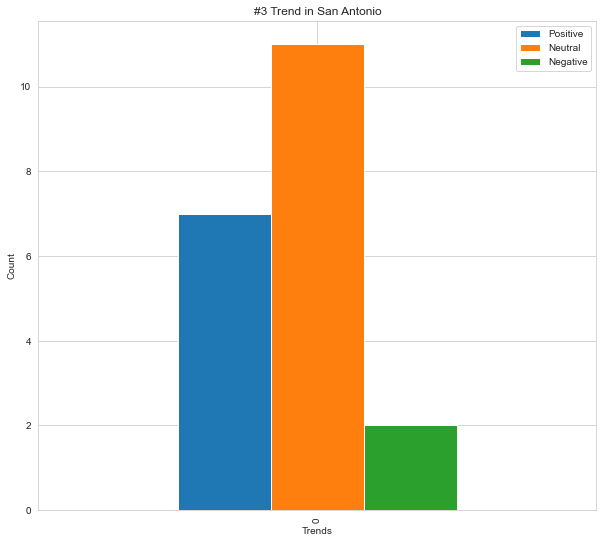

In [ ]:
dftrend3.plot(kind="bar",
 figsize=(10, 9),
  xlabel="Trends",
   ylabel="Count",
    title="#3 Trend in San Antonio")

## Geocoding

In [ ]:
import os
from geopy import OpenMapQuest

In [ ]:
geo = OpenMapQuest(api_key=os.environ['GeoCK'])
locations = ['222 Eastern Pkwy, Louisville, KY 40208',
             '440 N Whittington Pkwy, Louisville, KY 40222',
             'El Alamein، Egypt']
geo_locations = []
for loc in locations:
    geo_locations.append(geo.geocode(loc))

In [ ]:
geo_locations

[Location(Duthie Center for Engineering, 222, Eastern Parkway, Louisville, Jefferson County, Kentucky, 40208, United States of America, (38.21264035, -85.7608605714874, 0.0)),
 Location(Burhans Hall, 440, North Whittington Parkway, Hurstbourne, Jefferson County, Kentucky, 40222, United States of America, (38.25334785, -85.5843224594185, 0.0)),
 Location(العلمين, مطروح, مصر, (30.833944, 28.949268, 0.0))]

In [ ]:
from tweetutilities import get_tweepy_API

In [ ]:
api = get_tweepy_API()

In [ ]:
tweets = [] 
counts = {'total_tweets': 0, 'locations': 0}


### Location Listener

In [ ]:
from locationlistener import LocationListener

In [ ]:
location_listener = LocationListener(api, counts_dict=counts, 
    tweets_list=tweets, topic='Will Smith', limit=150)

In [ ]:
stream = tweepy.Stream(auth=api.auth, listener=location_listener)

In [ ]:
stream.filter(track=['Will Smith'], languages=['en'], is_async=False)

rmossconti: being able to recall various hilarious Will Smith rap lines is both a gift and a curse but can proudly say I’ve got… https://t.co/ehyZctJ2Ad

Mangakiko12: Steve Harvey has choice words for Will Smith after he slapped Chris Rock at the Oscars https://t.co/B1zWhNzJx6

balogunjide1: OK, Will Smith went too far, slapping Chris Rock with the whole world watching. But should he continue to be punish… https://t.co/5UPSt34c5Z



In [ ]:
counts['total_tweets'] #total tweets examined

8

In [ ]:
counts['locations'] #tweets kept (should match # for LocationListener limit UNLESS there was a timeout)

4

In [ ]:
print(f'{counts["locations"] / counts["total_tweets"]:.1%}') # % tweets that had locations

50.0%


In [ ]:
from tweetutilities import get_geocodes

In [ ]:
tweet_locations_fail = get_geocodes(tweets)

Getting coordinates for tweet locations...
Done geocoding


In [ ]:
tweet_locations_fail

1

In [ ]:
print(f'{tweet_locations_fail / counts["locations"]:.1%} of the locations could not be deciphered.')

25.0% of the locations could not be deciphered.


### Location Listener DataFrame

In [ ]:
import pandas as pd

In [ ]:
dft2 = pd.DataFrame(tweets)
dft = pd.DataFrame(tweets)

In [ ]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   screen_name  4 non-null      object
 1   text         4 non-null      object
 2   location     4 non-null      object
dtypes: object(3)
memory usage: 224.0+ bytes


In [ ]:
dft.head()

,screen_name,text,location
0,therealjayber,Imagine the kind of spellbinding power that Ja...,Tweet Smarter. Grow Faster. 👉
1,chomps443,@LeafyIsHere Will Smith should be white,The motion of the Ocean
2,biplov_jha,What have we learned from Will Smith and Johnn...,Nepal
3,KassAssassin,"I know his is ridiculous, but what upsets me t...","Brooklyn, NY"


In [ ]:
dft = dft.dropna()

In [ ]:
dft.head()

,screen_name,text,location
0,therealjayber,Imagine the kind of spellbinding power that Ja...,Tweet Smarter. Grow Faster. 👉
1,chomps443,@LeafyIsHere Will Smith should be white,The motion of the Ocean
2,biplov_jha,What have we learned from Will Smith and Johnn...,Nepal
3,KassAssassin,"I know his is ridiculous, but what upsets me t...","Brooklyn, NY"


In [ ]:
dft2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   screen_name  4 non-null      object
 1   text         4 non-null      object
 2   location     4 non-null      object
dtypes: object(3)
memory usage: 224.0+ bytes


In [ ]:
dft2.shape

(4, 3)

In [ ]:
dft.to_csv('dft.csv', index = False)
dft2.to_csv('dft2.csv', index = False)

### Map the Tweets

In [ ]:
import folium

In [ ]:
usmap = folium.Map(location=[39.8283, -98.5795],  # center of U.S.
                   tiles='Stamen Terrain',
                   zoom_start=4, detect_retina=True)

In [ ]:
usmap.save('base_map.html')

In [ ]:
for t in dft.itertuples():
    text = ': '.join([t.screen_name, t.text])
    popup = folium.Popup(text, parse_html=True)
    marker = folium.Marker((t.latitude, t.longitude), 
                           popup=popup)
    marker.add_to(usmap)

AttributeError: 'Pandas' object has no attribute 'latitude'

In [ ]:
usmap.save('tweet_map.html')

In [ ]:
usmap

In [ ]:
accounts_dict = {'accounts': [
    {'account': 100, 'name': 'Jones', 'balance': 24.98},
    {'account': 200, 'name': 'Doe', 'balance': 345.67}]}

In [ ]:
import json
with open('accounts.json', 'w') as accounts:
    json.dump(accounts_dict, accounts)

In [ ]:
with open('accounts.json', 'r') as accounts:
    accounts_from_json = json.load(accounts)

In [ ]:
print(accounts_from_json) #The one-key-to-one-value dictionary object
print(type(accounts_from_json))

{'accounts': [{'account': 100, 'name': 'Jones', 'balance': 24.98}, {'account': 200, 'name': 'Doe', 'balance': 345.67}]}
<class 'dict'>


In [ ]:
print(accounts_from_json['accounts']) #The individual dictionaries per account

[{'account': 100, 'name': 'Jones', 'balance': 24.98}, {'account': 200, 'name': 'Doe', 'balance': 345.67}]


In [ ]:
print(accounts_from_json['accounts'][0]) #The first dictionary/account 
print(accounts_from_json['accounts'][1]) #The second dictionary/account 

{'account': 100, 'name': 'Jones', 'balance': 24.98}
{'account': 200, 'name': 'Doe', 'balance': 345.67}


In [ ]:
import json

In [ ]:
with open('savedtweets.json', 'w') as outfile:
    json.dump(tweets, outfile, indent=4)

In [ ]:
with open('savedtweets.json') as json_file:
    tweets_from_json = json.load(json_file)


In [ ]:
tweets_from_json

[{'screen_name': 'therealjayber',
  'text': 'Imagine the kind of spellbinding power that Jada wields over Will Smith.\n\nOne unhappy look, and Will was immediatel… https://t.co/lOkKii20KH',
  'location': 'Tweet Smarter. Grow Faster. 👉'},
 {'screen_name': 'chomps443',
  'text': '@LeafyIsHere Will Smith should be white',
  'location': 'The motion of the Ocean'},
 {'screen_name': 'biplov_jha',
  'text': 'What have we learned from Will Smith and Johnny Depp?',
  'location': 'Nepal'},
 {'screen_name': 'KassAssassin',
  'text': 'I know his is ridiculous, but what upsets me the most about the Will Smith thing is, after getting slapped, Chris R… https://t.co/G3oxLaZ7ta',
  'location': 'Brooklyn, NY'}]

C:\Users\coleb\mambaforge\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


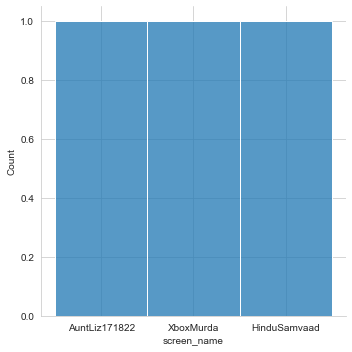

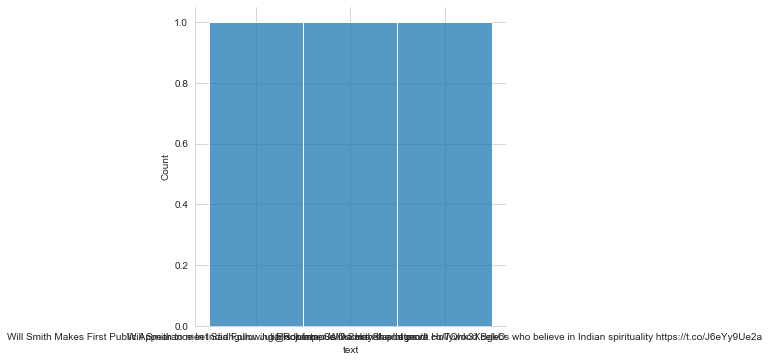

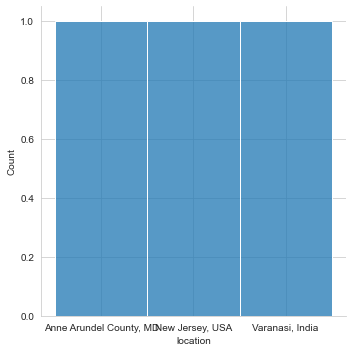

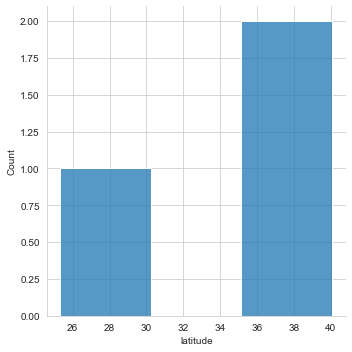

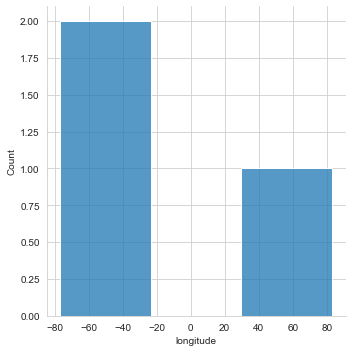

In [ ]:
for column in dft:
    sns.displot(x=column, data=dft)

In [ ]:
dft.corr()

,latitude,longitude
latitude,1.000000,-0.996873
longitude,-0.996873,1.000000


In [ ]:
dft.describe()

,latitude,longitude
count,3.000000,3.000000
mean,34.794549,-22.656662
std,8.210207,91.514389
min,25.335649,-76.573454
25%,32.153954,-75.488808
50%,38.972258,-74.404162
75%,39.523998,4.301733
max,40.075738,83.007629


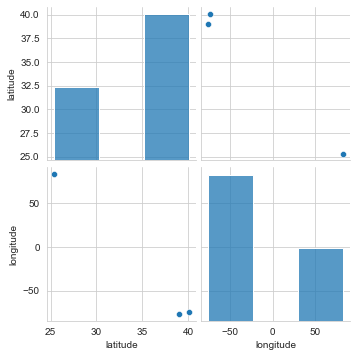

In [ ]:
sns.pairplot(dft)